In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('../0_datasets/house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='price', ylabel='Count'>

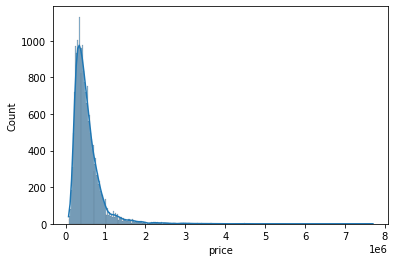

In [4]:
sns.histplot(dataset['price'], kde=True) 

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

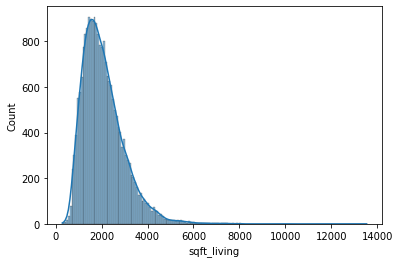

In [5]:
sns.histplot(dataset['sqft_living'], kde=True) 

### Sem tratamento

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [12]:
X = dataset['sqft_living'].values
X.shape

(21613,)

In [15]:
X = X.reshape(-1,1)
X.shape

(21613, 1)

In [16]:
y = dataset['price']
y.shape

(21613,)

In [17]:
modelo_regressao = LinearRegression()
modelo_regressao.fit(X,y)

LinearRegression()

In [24]:
previsoes = modelo_regressao.predict(X)
previsoes, y

(array([287555.06702452, 677621.82640197, 172499.40418656, ...,
        242655.29616092, 405416.96554144, 242655.29616092]),
 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 21608    360000.0
 21609    400000.0
 21610    402101.0
 21611    400000.0
 21612    325000.0
 Name: price, Length: 21613, dtype: float64)

In [27]:
mean_absolute_error(y, previsoes) # erro para mais ou para menos (em reais)

173688.27335953104

In [26]:
r2_score(y, previsoes) # quanto menor o valor, melhor o é o resultado.

0.4928532179037931

### Com tratamentos

In [29]:
import numpy as np

In [33]:
# Tratar distribuição gama para distribuição normal
X_novo = np.log(X)
X_novo

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

<AxesSubplot:ylabel='Count'>

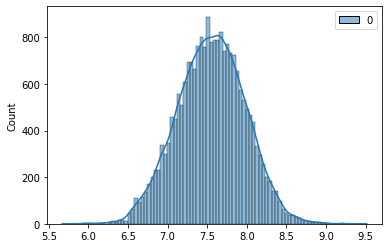

In [34]:
sns.histplot(X_novo, kde=True)

In [40]:
y_novo = np.log(y)
y_novo

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: price, Length: 21613, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

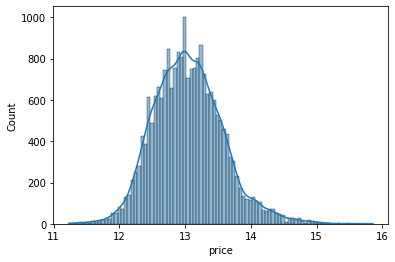

In [41]:
sns.histplot(y_novo, kde=True)

In [42]:
modelo_regressao_novo = LinearRegression()
modelo_regressao_novo.fit(X_novo, y_novo)

LinearRegression()

In [43]:
previsoes_novo = modelo_regressao_novo.predict(X_novo)
previsoes_novo, y_novo

(array([12.64862279, 13.29995815, 12.29142267, ..., 12.52669538,
        12.9034105 , 12.52669538]),
 0        12.309982
 1        13.195614
 2        12.100712
 3        13.311329
 4        13.142166
            ...    
 21608    12.793859
 21609    12.899220
 21610    12.904459
 21611    12.899220
 21612    12.691580
 Name: price, Length: 21613, dtype: float64)

In [44]:
mean_absolute_error(y_novo, previsoes_novo)

0.314671784942507

In [45]:
r2_score(y_novo, previsoes_novo) # quanto menor o valor, melhor o é o resultado.

0.45550706431577015